<a href="https://colab.research.google.com/github/Engyogesh/miniproject/blob/main/powerlifting_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Simulate more data for demonstration
np.random.seed(0)  # For reproducibility
states = ['CA', 'NY', 'TX', 'FL', 'PA', 'IL', 'OH', 'MI', 'GA', 'NC', 'NJ', 'VA', 'WA', 'AZ', 'MA', 'IN', 'MO', 'MD', 'WI', 'CO', 'MN', 'TN', 'KY', 'OR', 'CT', 'OK', 'IA', 'AR', 'KS', 'NV']
sex = ['M', 'F']
years = [2020, 2021]

data = {
    'Age': np.random.randint(18, 60, size=500).tolist() + [np.nan] * 50,
    'Sex': np.random.choice(sex, size=500).tolist() + ['M'] * 25 + ['F'] * 25,
    'State': np.random.choice(states, size=500).tolist() + np.random.choice(states, size=50).tolist(),
    'Year': np.random.choice(years, size=500).tolist() + np.random.choice(years, size=50).tolist()
}

# Create DataFrame
df = pd.DataFrame(data)

# Statistics on missing Age values
rows_nan_age = df['Age'].isna().sum()  # Rows with NaN Age
indiv_nan_age = df[df['Age'].isna()].drop_duplicates(subset=['Sex', 'State']).shape[0]  # Unique individuals
indiv_nan_age_m = df[(df['Age'].isna()) & (df['Sex'] == 'M')].shape[0]  # Males with NaN Age
indiv_nan_age_f = df[(df['Age'].isna()) & (df['Sex'] == 'F')].shape[0]  # Females with NaN Age
mean_age_m = df[df['Sex'] == 'M']['Age'].mean()  # Mean age for males
mean_age_f = df[df['Sex'] == 'F']['Age'].mean()  # Mean age for females

print(f"# Rows with Age NaN: {rows_nan_age}")
print(f"# Individuals with Age NaN: {indiv_nan_age}")
print(f"# Males with Age NaN: {indiv_nan_age_m}")
print(f"# Females with Age NaN: {indiv_nan_age_f}")
print(f"Mean Age for Males: {mean_age_m}")
print(f"Mean Age for Females: {mean_age_f}")

# Top 10 States for Men
top_10_men = df[df['Sex'] == 'M'].groupby('State').size().sort_values(ascending=False).head(10)

# Top 10 States for Women
top_10_women = df[df['Sex'] == 'F'].groupby('State').size().sort_values(ascending=False).head(10)

print("\nTop 10 States for Men:\n", top_10_men)
print("\nTop 10 States for Women:\n", top_10_women)

# For more than 21-30 states, we need to select indices from 21 to 30 in the sorted list
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]
top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Create the table with two columns: State and Count for Men
table_top_states_men = pd.DataFrame({
    'State': top_states_men.index,
    'Count': top_states_men.values
})
print("\nTable of States 21-30 for Men:\n", tabulate(table_top_states_men, headers='keys', tablefmt='grid'))

# Create the table with two columns: State and Count for Women
table_top_states_women = pd.DataFrame({
    'State': top_states_women.index,
    'Count': top_states_women.values
})
print("\nTable of States 21-30 for Women:\n", tabulate(table_top_states_women, headers='keys', tablefmt='grid'))


# Rows with Age NaN: 50
# Individuals with Age NaN: 33
# Males with Age NaN: 25
# Females with Age NaN: 25
Mean Age for Males: 38.60966542750929
Mean Age for Females: 38.36796536796537

Top 10 States for Men:
 State
MI    16
FL    14
PA    14
OH    14
MD    14
CA    12
AZ    12
KS    11
IA    11
TN    10
dtype: int64

Top 10 States for Women:
 State
MO    15
CO    13
TN    12
OR    12
IN    12
MD    11
TX    11
NY    11
NV    11
WA    10
dtype: int64

Table of States 21-30 for Men:
 +----+---------+---------+
|    | State   |   Count |
+====+=========+=========+
|  0 | TX      |       8 |
+----+---------+---------+
|  1 | GA      |       8 |
+----+---------+---------+
|  2 | AR      |       8 |
+----+---------+---------+
|  3 | NY      |       8 |
+----+---------+---------+
|  4 | WA      |       8 |
+----+---------+---------+
|  5 | NC      |       7 |
+----+---------+---------+
|  6 | IL      |       7 |
+----+---------+---------+
|  7 | MA      |       7 |
+----+---------+---------+

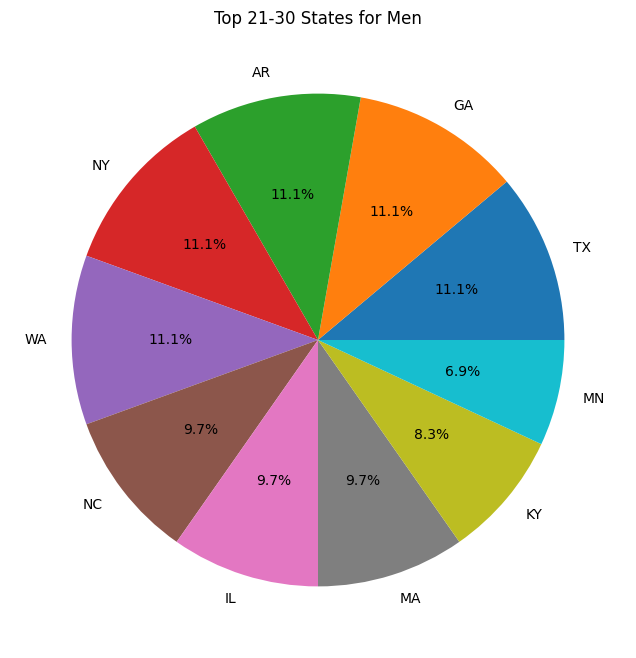

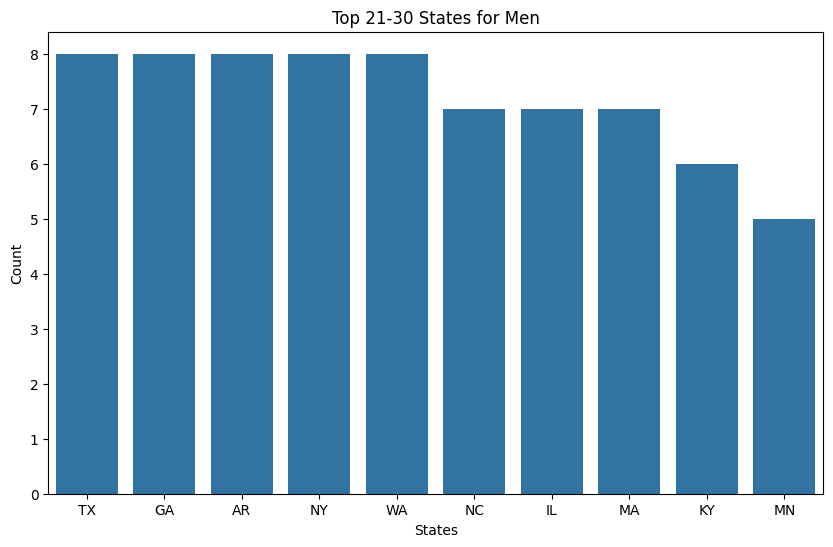

In [19]:
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_men, labels=top_states_men.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Men")
plt.show()

# Bar Chart for Men (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_men.index, y=top_states_men.values)
plt.title("Top 21-30 States for Men")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

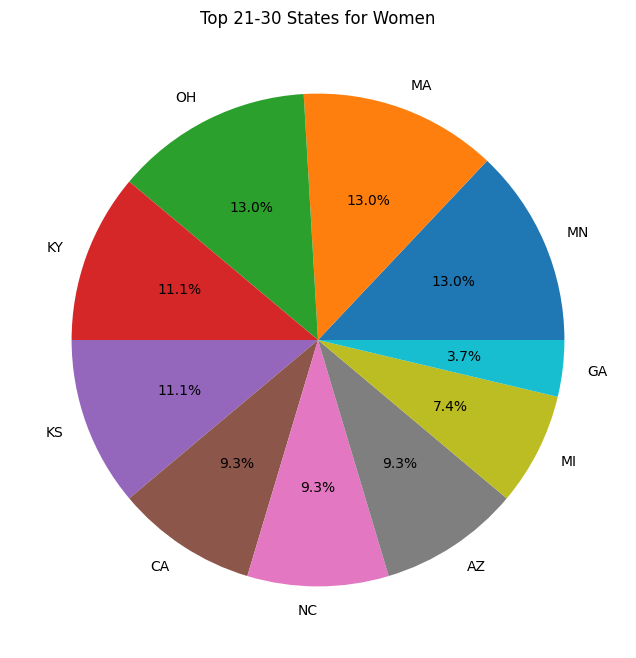

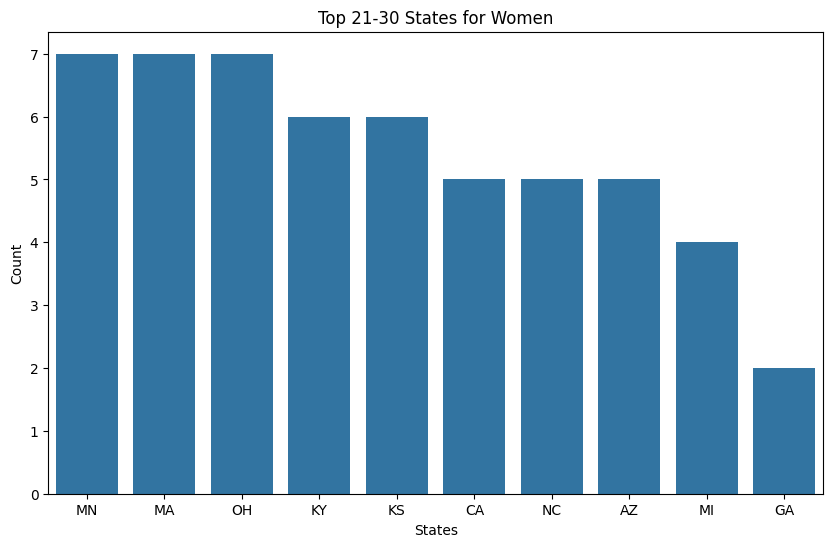

In [20]:
top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_women, labels=top_states_women.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Women")
plt.show()

# Bar Chart for Women (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_women.index, y=top_states_women.values)
plt.title("Top 21-30 States for Women")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

In [26]:
def top_states_by_year(sex, year, top_n=10):
    return df[(df['Sex'] == sex) & (df['Year'] == year)] \
            .groupby('State').size() \
            .sort_values(ascending=False).head(top_n)

# Get Top 10 States for Men and Women in 2021
top_10_states_men_2021 = top_states_by_year('M', 2021)
top_10_states_women_2021 = top_states_by_year('F', 2021)

# Function to Print Data in a Box
def print_in_box(title, data):
    border = '+' + '-' * (len(title) + 2) + '+'
    print(border)
    print(f"| {title} |")
    print(border)
    for state, count in data.items():
        print(f"| {state:<4} | {count:>5} |")
    print(border)

# Display the Results
print_in_box("Top 10 States for Men in 2021", top_10_states_men_2021)
print_in_box("Top 10 States for Women in 2021", top_10_states_women_2021)


+-------------------------------+
| Top 10 States for Men in 2021 |
+-------------------------------+
| OH   |    12 |
| MD   |    10 |
| MI   |     8 |
| PA   |     8 |
| TN   |     7 |
| IA   |     7 |
| AR   |     6 |
| CA   |     6 |
| WA   |     6 |
| NY   |     6 |
+-------------------------------+
+---------------------------------+
| Top 10 States for Women in 2021 |
+---------------------------------+
| OR   |     8 |
| MO   |     8 |
| WI   |     7 |
| MD   |     7 |
| IN   |     7 |
| TX   |     6 |
| WA   |     6 |
| FL   |     5 |
| IA   |     5 |
| NV   |     5 |
+---------------------------------+


<ipython-input-22-244580f3d8ef>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)


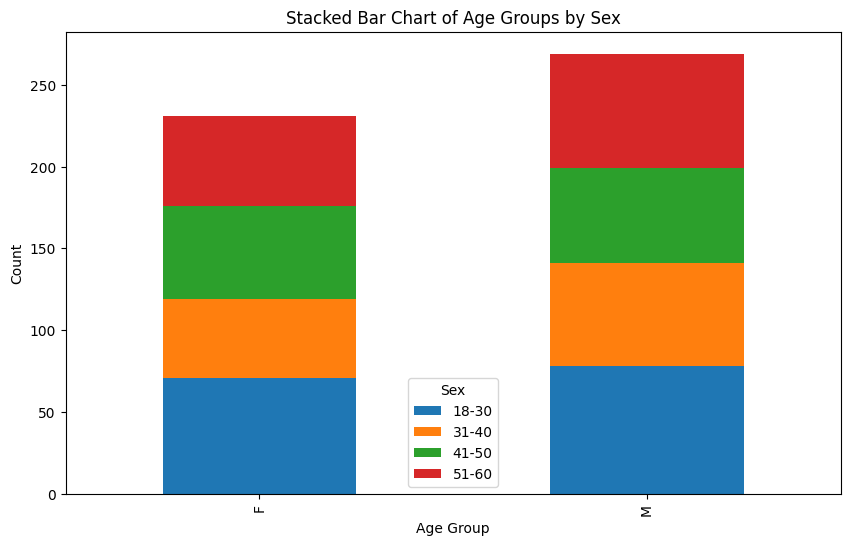

In [22]:
# Define age bins
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']

# Add age group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a pivot table
age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)

# Stacked Bar Chart
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Age Groups by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


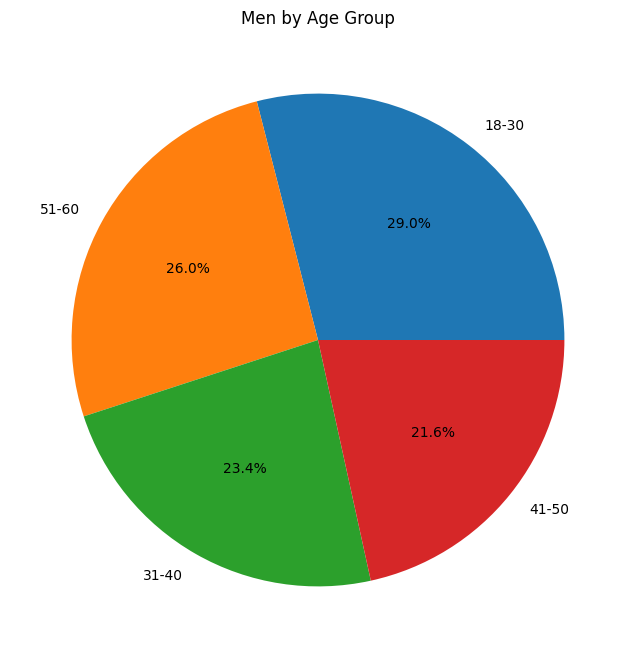

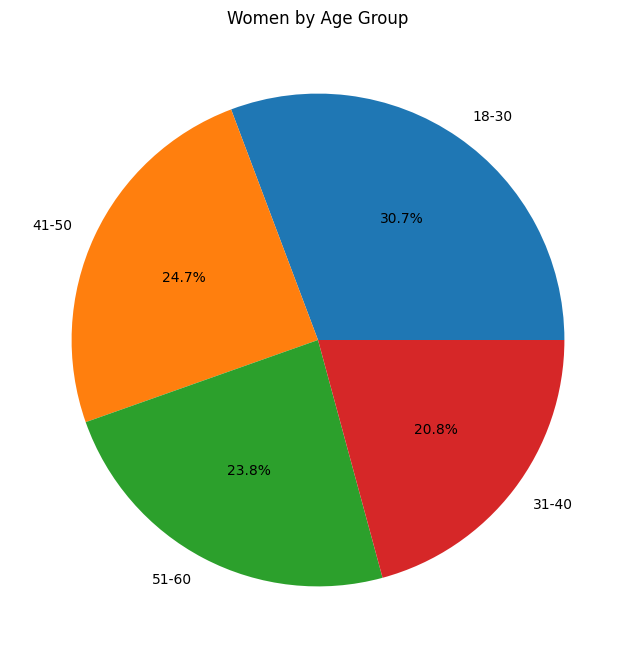

In [23]:
# Age group distribution for men
age_group_dist_men = df[df['Sex'] == 'M']['Age Group'].value_counts()

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_men, labels=age_group_dist_men.index, autopct='%1.1f%%')
plt.title("Men by Age Group")
plt.show()

# Age group distribution for women
age_group_dist_women = df[df['Sex'] == 'F']['Age Group'].value_counts()

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_women, labels=age_group_dist_women.index, autopct='%1.1f%%')
plt.title("Women by Age Group")
plt.show()


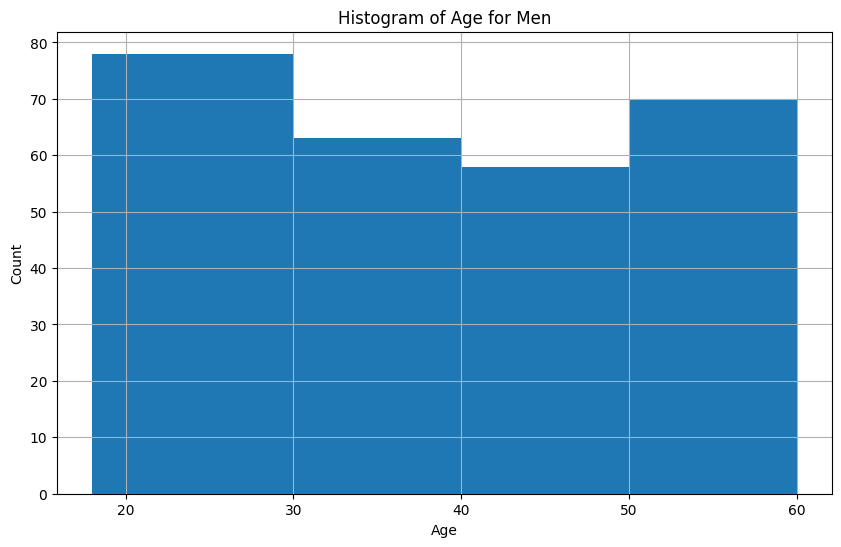

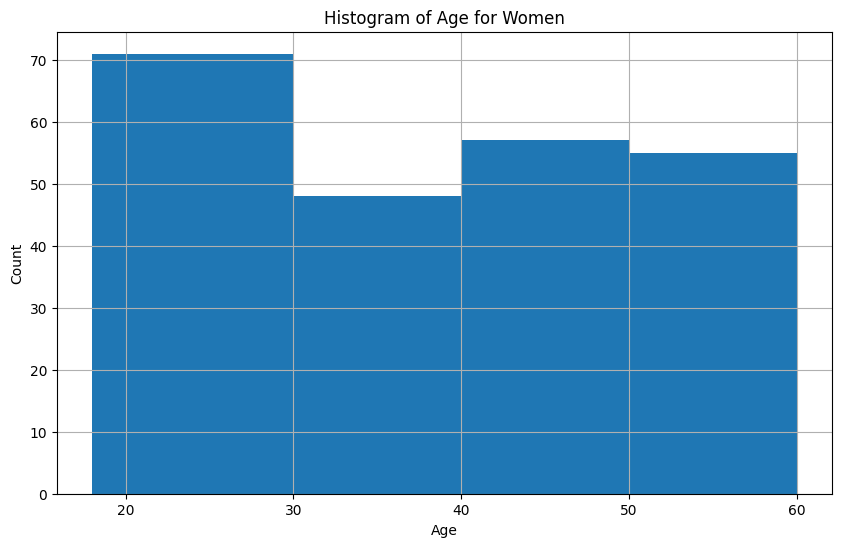

In [25]:
# Histogram for Men by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'M']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for Women by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'F']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
